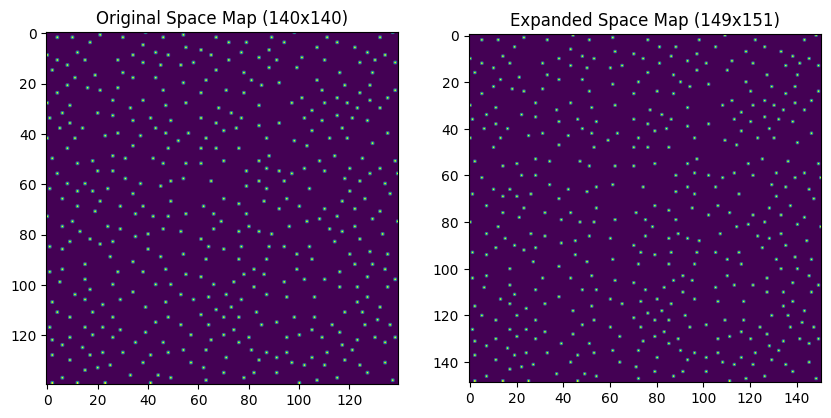

Result 1: 9623138


In [53]:
import matplotlib.pyplot as plt


with open("data_inputs/day11_input.txt") as f:
    data = f.read()

# ---- Part 1 ----

original_data = data

data = data.replace(".", "0").replace("#", "1")

space_map = [list(map(int, line)) for line in data.split("\n")]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(space_map)
axs[0].set_title(f"Original Space Map ({len(space_map)}x{len(space_map[0])})")


# Galaxy expansion
empty_rows = []
for i in range(len(space_map)):
    if sum(space_map[i]) == 0:
        empty_rows.append(i)

empty_cols = []
for j in range(len(space_map[0])):
    if sum([space_map[i][j] for i in range(len(space_map))]) == 0:
        empty_cols.append(j)


for row in empty_rows[::-1]:
    space_map.insert(row, [0 for _ in range(len(space_map[0]))])

for col in empty_cols[::-1]:
    for i in range(len(space_map)):
        space_map[i].insert(col, 0)

axs[1].imshow(space_map)
axs[1].set_title(f"Expanded Space Map ({len(space_map)}x{len(space_map[0])})")
plt.show()


galaxies = []

for i in range(len(space_map)):
    for j in range(len(space_map[0])):
        if space_map[i][j] == 1:
            galaxies.append((i, j))


galaxy_distances = {}

for i in range(0, len(galaxies)):
    for j in range(i+1, len(galaxies)):
        galaxy_distances[(i, j)] = abs(galaxies[i][0] - galaxies[j][0]) + abs(galaxies[i][1] - galaxies[j][1])

print("Result 1:", sum(galaxy_distances.values()))

In [52]:
# ---- Part 2 ----

space_map2 = [list(map(int, line)) for line in data.split("\n")]

galaxies2 = []

for i in range(len(space_map2)):
    for j in range(len(space_map2[0])):
        if space_map2[i][j] == 1:
            galaxies2.append((i, j))

for i in range(len(galaxies2)):
    expansion_y = 999999 * len([row for row in empty_rows if row < galaxies2[i][0]])
    expansion_x = 999999 * len([col for col in empty_cols if col < galaxies2[i][1]])
    galaxies2[i] = (galaxies2[i][0] + expansion_y, galaxies2[i][1] + expansion_x)


galaxy_distances2 = {}

for i in range(0, len(galaxies2)):
    for j in range(i+1, len(galaxies2)):
        galaxy_distances2[(i, j)] = abs(galaxies2[i][0] - galaxies2[j][0]) + abs(galaxies2[i][1] - galaxies2[j][1])

print("Result 2:", sum(galaxy_distances2.values()))

Result 2: 726820169514
